In [1]:
import pandas as pd
from google.colab import files
files.upload()
df = pd.read_csv("cart_data.csv")

Saving cart_data.csv to cart_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cart_data.csv")
df['abandoned'] = df['abandoned'].apply(lambda x: 1 if str(x).lower() in ['yes','true','1'] else 0)
df['items_removed'] = df['items_removed'].fillna(0)


In [4]:
bins = [0,100,500,1000,5000,99999]
labels = ['0-100','100-500','500-1000','1000-5000','5000+']
df['range'] = pd.cut(df['total_cart_value'], bins=bins, labels=labels)
print(df.groupby('range', observed=True)['abandoned'].mean())


range
0-100        0.000000
100-500      0.500000
500-1000     0.666667
1000-5000    0.500000
Name: abandoned, dtype: float64


In [5]:
print(df.groupby('items_added')['abandoned'].mean().sort_values(ascending=False))


items_added
6    1.000000
4    1.000000
3    0.666667
2    0.333333
5    0.333333
1    0.000000
Name: abandoned, dtype: float64


In [8]:
df['items_removed'] = df['items_removed'].fillna(0)


abandoned
0    667.142857
1    635.000000
Name: total_cart_value, dtype: float64


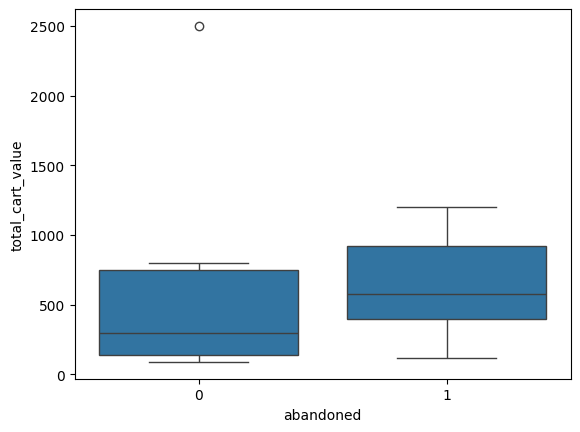

In [9]:
print(df.groupby('abandoned')['total_cart_value'].mean())
sns.boxplot(x='abandoned', y='total_cart_value', data=df)
plt.show()


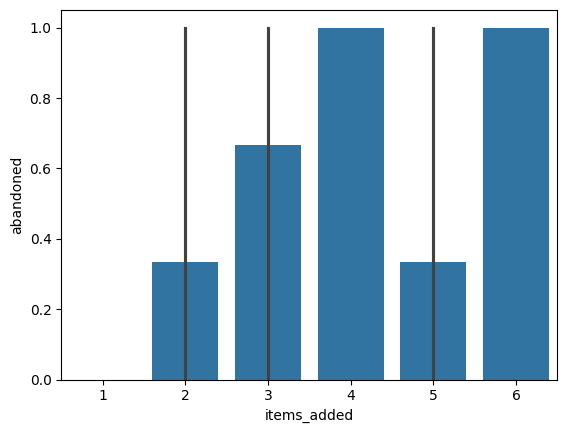

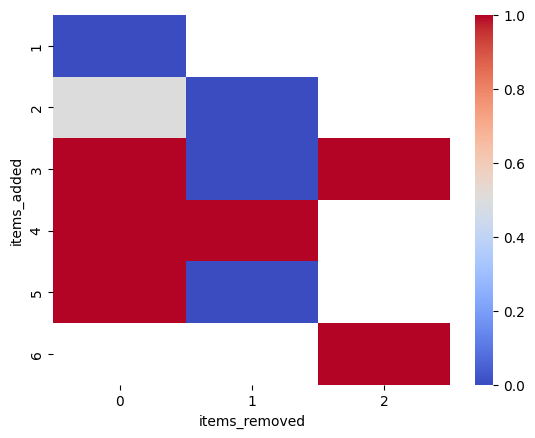

In [13]:


sns.barplot(x='items_added', y='abandoned', data=df)
plt.show()

pivot = df.pivot_table(index='items_added', columns='items_removed', values='abandoned', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')
plt.show()
